<a href="https://colab.research.google.com/github/lazizrakhmat/DS-Visualization/blob/main/Copy_of_04_VISUAL_AMALIYOT_03_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science va Sun'iy Intellekt Praktikum

## 4-MODUL. VIZUALIZASIYA
## 4.3 Ustunli diagramma (bar chart) va issiqlik xaritasi (heatmap) 

Ustunli diagramma turli kategoriyadagi qiymatlarni solishtirish uchun juda qulay. 

![](https://www.mathsisfun.com/data/images/bar-graph-fruit.svg)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/uzbekistan.csv", index_col=0)
df.head()

,Maydoni (kv.km),Aholisi
Boʻlinishi,,
Andijon viloyati,4200.0,1899000.0
Buxoro viloyati,39400.0,1384700.0
Fargʻona viloyati,6800.0,2597000.0
Jizzax viloyati,20500.0,910500.0
Xorazm viloyati,6300.0,1200000.0


In [4]:
df.shape

(13, 2)

In [5]:
df.columns = ['maydon','aholi'] # ustunlarga nom berib oldik
df

,maydon,aholi
Boʻlinishi,,
Andijon viloyati,4200.0,1899000.0
Buxoro viloyati,39400.0,1384700.0
Fargʻona viloyati,6800.0,2597000.0
Jizzax viloyati,20500.0,910500.0
Xorazm viloyati,6300.0,1200000.0
Namangan viloyati,7900.0,1862000.0
Navoiy viloyati,110800.0,767500.0
Qashqadaryo viloyati,28400.0,2029000.0
Qoraqalpogʻiston Respublikasi,160000.0,1200000.0


## Bar chart grafig chizamiz

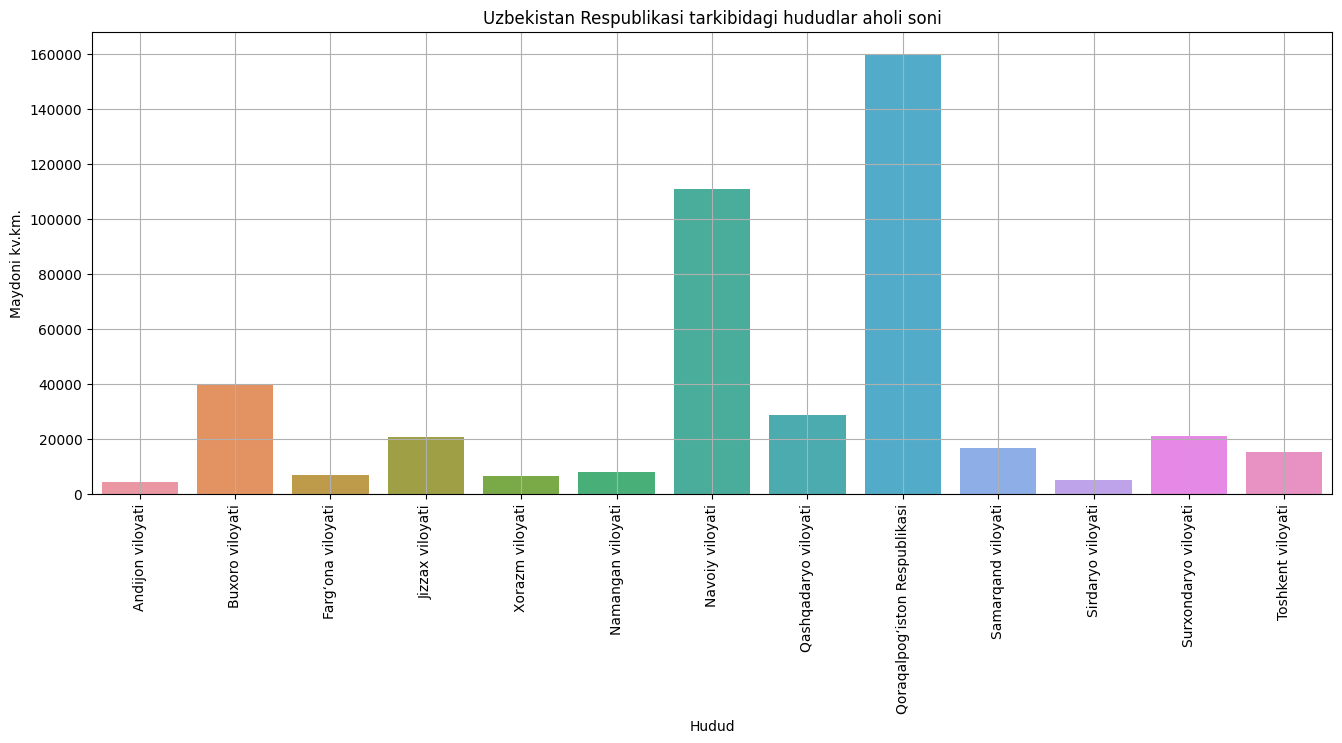

In [6]:
plt.figure(figsize=(16,6))
sns.barplot(x=df.index, y=df['maydon']) # barplot - bu bar yani ustun ko'rinishida grafig ko'rnishi
plt.title("Uzbekistan Respublikasi tarkibidagi hududlar aholi soni")
plt.xlabel("Hudud")
plt.ylabel("Maydoni kv.km.")
plt.grid() # Chizmaga va vertikal chiziqlar (setka) grafig
plt.xticks(rotation=90)
plt.show()

## Heatmap

Keling endi yangi jadval o'qiymiz. Quyidagi jadvalda AQSHdagi ba'zi muzeylarga turli sanalarda tashrif buyurganlar soni saqlangan. Biz faqatgina birinchi muzey uchun qiymatlarni o'qiymi ( `usecols=[0,1]`)

In [7]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv", index_col=0, parse_dates=[0], usecols=[0,1])
df.head()

,Avila Adobe
Date,
2014-01-01,24778
2014-02-01,18976
2014-03-01,25231
2014-04-01,26989
2014-05-01,36883


### Keling, df indeksidagi qiymatlarni ustunini `datetime` formatiga o'tkazib olamiz

In [8]:
type(df.index) # index turini tekshirib olamiz, Datetime yani endi (parse_date=[0]) yordamida endi, biz day/month/year, ni ajratib ola olamiz

pandas.core.indexes.datetimes.DatetimeIndex

### Ma'lumotlarni yil va oy bo'yicha ajratamiz. 

In [9]:
df['month'] = [i.month for i in df.index] # for loop yordamida, yangi ustun yaratib olamiz
df['year'] = [i.year for i in df.index] # bu yerdaham for loop yordamida year ustunini yaratib oldik
df.head() # biz parse_date=[0], foydalanganimiz uchungina bu function'ni ishlaydi

,Avila Adobe,month,year
Date,,,
2014-01-01,24778,1,2014
2014-02-01,18976,2,2014
2014-03-01,25231,3,2014
2014-04-01,26989,4,2014
2014-05-01,36883,5,2014


In [10]:
df.groupby(['month','year']).max().head(10) # aslida bizda max qiymat yo'q lekin groupby 'ga qo'shimcha nimadur bersakgina bu ishlaydi

Avila Adobe
month year             
1     2014        24778
      2015        20438
      2016        19659
      2017        18792
      2018        16265
2     2014        18976
      2015        15578
      2016        17378
      2017        14035
      2018        14718

### `unstack` - groupby'ni aksi, 2 ta indeksni oladida, 1 tasini ustunga va qolgan 1 birini qatorga ajratadi

In [11]:
df_m = df.groupby(['month','year']).max().unstack(level=0) # bu yerda biz (level= 1 yoki 0) bera olamiz
df_m # bu yerda, qatorlar(year) va ustunlar(month) agar biz (level=1) qilsak o'rni almashadi

Avila Adobe                                                        \
month          1        2        3        4        5        6        7    
year                                                                      
2014      24778.0  18976.0  25231.0  26989.0  36883.0  29487.0  32378.0   
2015      20438.0  15578.0  21297.0  26670.0  34383.0  30569.0  41242.0   
2016      19659.0  17378.0  20322.0  24521.0  31728.0  23696.0  31689.0   
2017      18792.0  14035.0  20680.0  25234.0  30029.0  22169.0  30831.0   
2018      16265.0  14718.0  19001.0  18966.0  25173.0  22171.0  23136.0   

                                                    
month       8        9        10       11       12  
year                                                
2014   37680.0  28473.0  27995.0  25691.0  18754.0  
2015   30700.0  20967.0  29764.0  24483.0  21426.0  
2016   25987.0  22897.0  25040.0  17760.0  20107.0  
2017   27009.0  23403.0  22164.0  17629.0  18339.0  
2018   20815.0  21020.0  19280.0  17163.0      NaN

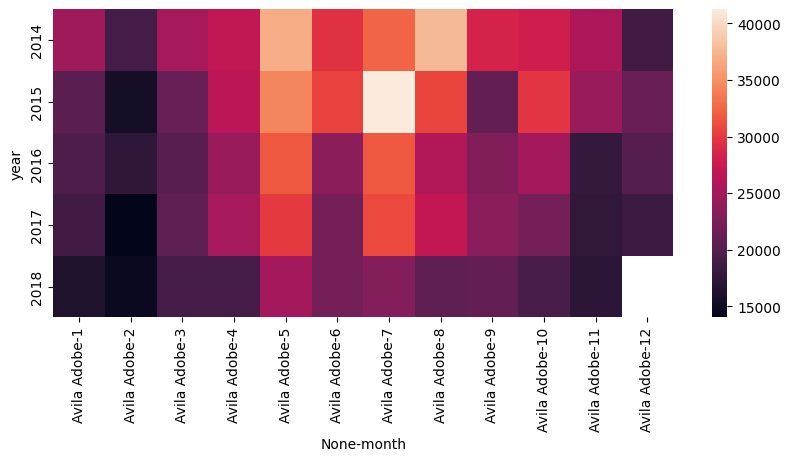

In [16]:
plt.figure(figsize=(10,4))
sns.heatmap(data=df_m)
plt.show()

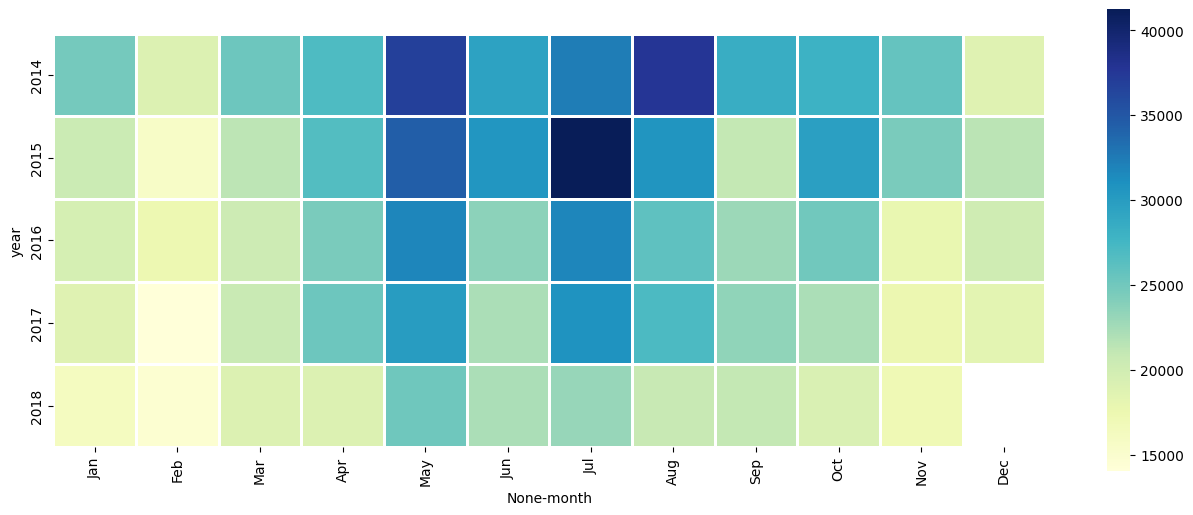

In [17]:
plt.figure(figsize=(16,6))
sns.heatmap(data=df_m, cmap="YlGnBu", linewidths=1, square=True)
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
plt.show()